In [3]:
# Imports
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np

## Figure 1

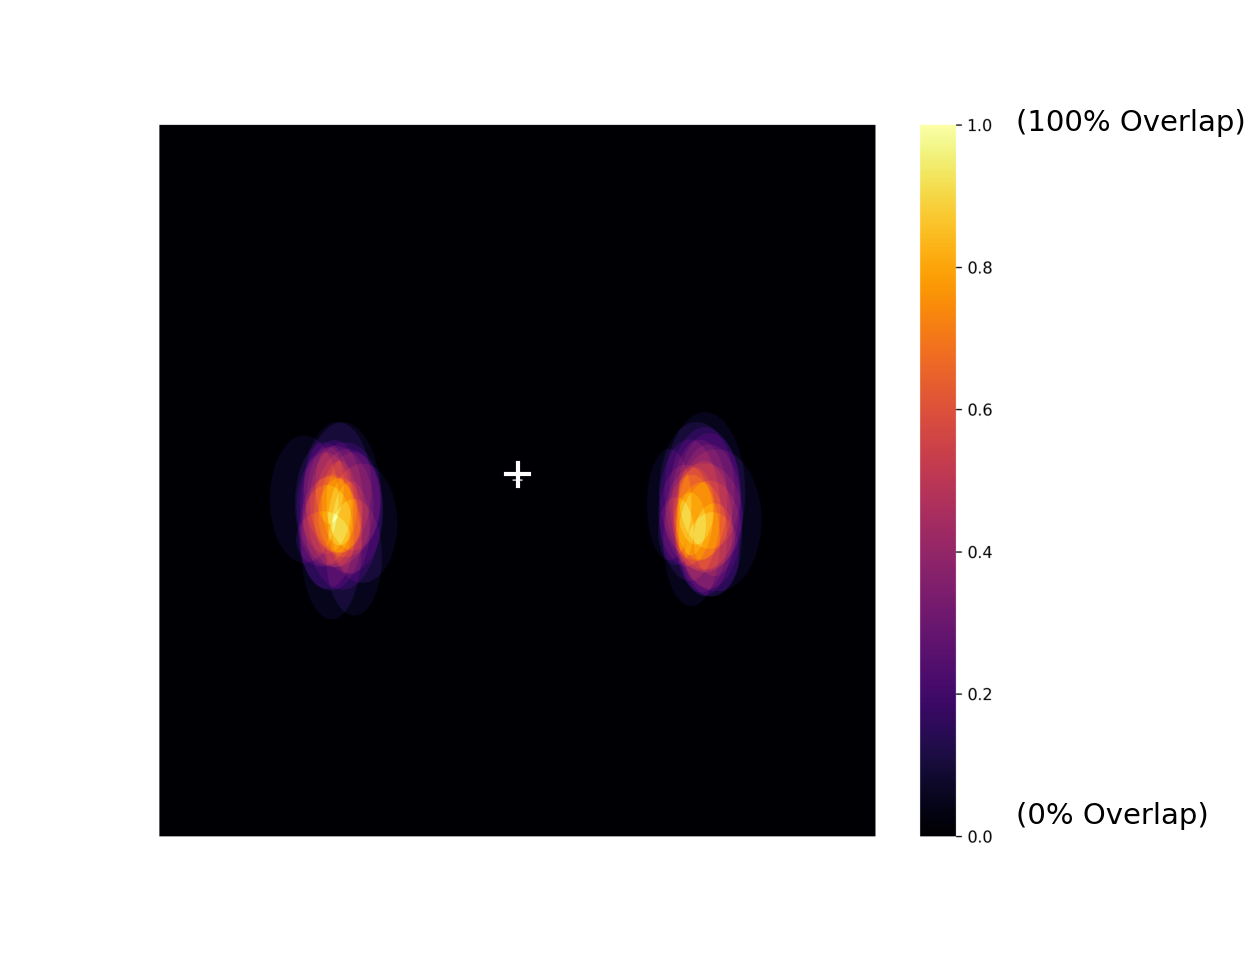

In [2]:
heat_map_png = Image.open('../plots/blind_spot_heatmap.png')
fig = plt.figure(figsize=(12, 8), dpi=150)
plt.imshow(heat_map_png)
plt.axis('off')

x_offset, y_offset = -195, -5
cross_size = 30
lw = 2
cross_x, cross_y = heat_map_png.size[0] / 2 + x_offset , heat_map_png.size[1] / 2 + y_offset # Center position

plt.plot([cross_x - cross_size, cross_x + cross_size], [cross_y, cross_y], color='white', lw=lw)  # Horizontal line
plt.plot([cross_x, cross_x], [cross_y - cross_size, cross_y + cross_size], color='white', lw=lw)  # Vertical line
plt.text(heat_map_png.size[0]-400, 300, '(100% Overlap)', color='black', fontsize=14)
plt.text(heat_map_png.size[0]-400, heat_map_png.size[1]-300, '(0% Overlap)', color='black', fontsize=14)
plt.savefig("../plots/heatmap.png")
plt.show()


## Figure 2

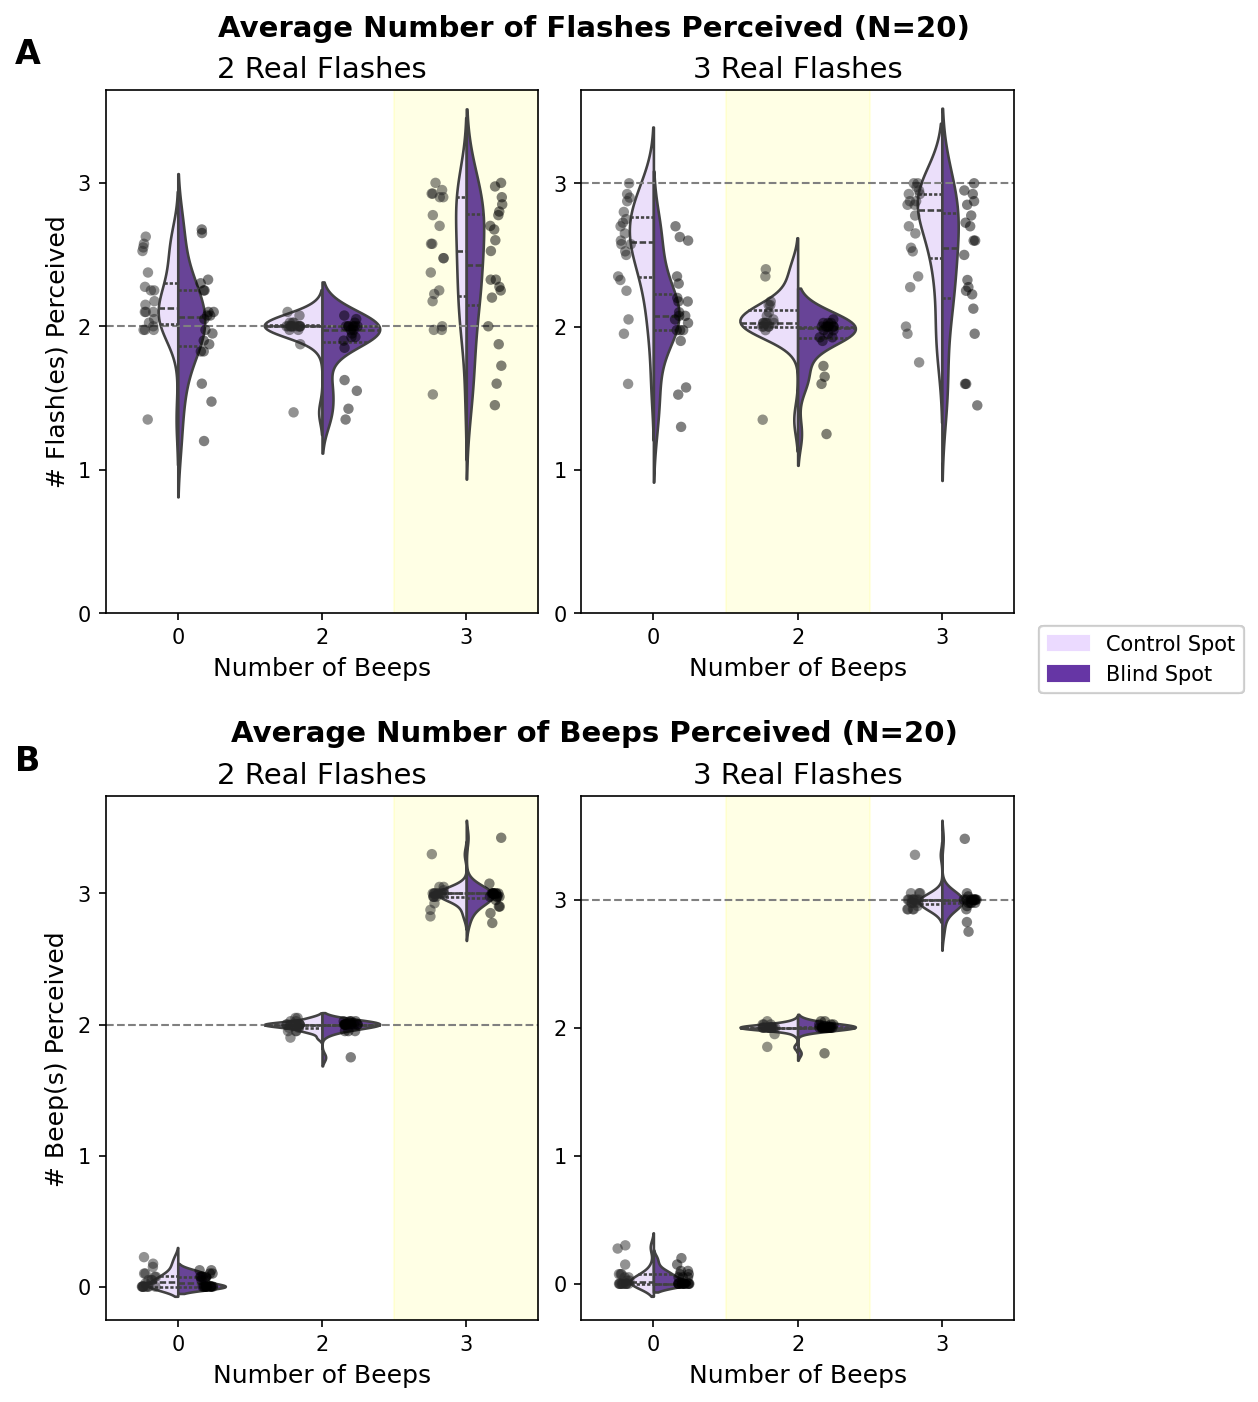

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 9600
Model:                            GLM   Df Residuals:                     9596
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13594.
Date:                Wed, 11 Jun 2025   Deviance:                       1576.8
Time:                        18:27:14   Pearson chi2:                 1.46e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6578      0.037     17.765      0.0

In [93]:
# 2 x 2
# Panel A: 2 Real Flashes, 3 Real Flashes (Flash response)
# Panel B: 2 Real Flashes, 3 Real Flashes (Beep response)
# Hue: by location (blindspot 0/1)


# Load all CSV files
csv_files = [f for f in os.listdir('csv') if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join('csv', f)) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Create Flash and Beep DFs
flash_df = df[df['response_type'] == 1].copy()
beep_df = df[df['response_type'] == 2].copy()

# Create data for plotting
# A (left): 2 Real Flashes (Flash response)
a_two = flash_df[flash_df['n_flash'] == 2].groupby(
    ['subj_id', 'n_beep', 'blindspot'], as_index=False).agg({'response': 'mean'})
# print(a_two.head())

# A (right): 3 Real Flashes (Flash response)
a_three = flash_df[flash_df['n_flash'] == 3].groupby(
    ['subj_id', 'n_beep', 'blindspot'], as_index=False).agg({'response': 'mean'})

# B (left): 2 Real Flashes (Beep response)
b_two = beep_df[beep_df['n_flash'] == 2].groupby(
    ['subj_id', 'n_beep', 'blindspot'], as_index=False).agg({'response': 'mean'})
# print(b_two.head())

# B (right): 3 Real Flashes (Beep response)
b_three = beep_df[beep_df['n_flash'] == 3].groupby(
    ['subj_id', 'n_beep', 'blindspot'], as_index=False).agg({'response': 'mean'})

fig, axs = plt.subplots(2, 2, figsize=(8, 10), dpi=150)

data_to_plot = [
    (a_two, '2 Real Flashes', axs[0, 0], '# Flash(es) Perceived'),
    (a_three, '3 Real Flashes', axs[0, 1], ''),
    (b_two, '2 Real Flashes', axs[1, 0], '# Beep(s) Perceived'),
    (b_three, '3 Real Flashes', axs[1, 1], '')
]

custom_palette = {0: '#ebdaff', 1: '#6636a5'}

for data, title, ax, ylabel in data_to_plot:
    
    if title == '2 Real Flashes':
        # add a dashed line at y=2
        ax.axhline(y=2, color='grey', linestyle='--', linewidth=1, label='_nolegend_')
        ax.axvspan(1.5, 2.5, color='yellow', alpha=0.1, label='_nolegend_')
    else:
        ax.axhline(y=3, color='grey', linestyle='--', linewidth=1, label='_nolegend_')
        ax.axvspan(0.5, 1.5, color='yellow', alpha=0.1, label='_nolegend_')

    sns.violinplot(data=data, x='n_beep', y='response', hue='blindspot',
                   split=True, inner='quartile', palette=custom_palette, ax=ax,
                   legend=False)
    sns.stripplot(data=data, x='n_beep', y='response', hue='blindspot',
                  dodge=True, palette='dark:black', alpha=0.5, size=5, jitter=0.1, ax=ax,
                  legend=False)
    ax.set_yticks([0,1,2,3])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Number of Beeps', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    handles = [
        plt.Rectangle((0,0), 1, 1, color=custom_palette[0], label='Control Spot'),
        plt.Rectangle((0,0), 1, 1, color=custom_palette[1], label='Blind Spot')
    ]
    fig.legend(handles=handles, loc='center right', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize=10)



# Add row labels
for row, label, title, yloc in zip([0, 1], ['A', 'B'], ['Average Number of Flashes Perceived (N=20)', 'Average Number of Beeps Perceived (N=20)'], [0.93, 0.46]):
    axs[row, 0].text(-0.15, 1.1, label, transform=axs[row, 0].transAxes,
                    fontsize=16, fontweight='bold', va='top', ha='right')
    fig.text(0.5, yloc, title, 
            ha='center', va='top', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(
    hspace=0.35, 
    top=0.88, 
    right=0.85)
plt.show()

# Data analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare the dataframe
analysis_df = flash_df.copy()

# For count models, we need integer responses - ensure your response variable is integer
analysis_df['response'] = analysis_df['response'].round().astype(int)

# Basic Poisson model
poisson_model = smf.glm(
    formula='response ~ n_flash + n_beep + blindspot',
    data=analysis_df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())

# More complex model with interaction terms
poisson_model_int = smf.glm(
    '''response ~ n_flash*n_beep + n_flash:blindspot + n_beep:blindspot''',
    data=analysis_df,
    family=sm.families.Poisson()
).fit().summary()
print(poisson_model_int)

## Figure 3

C:\Users\ailen\AppData\Local\Temp\ipykernel_35484\2923770646.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


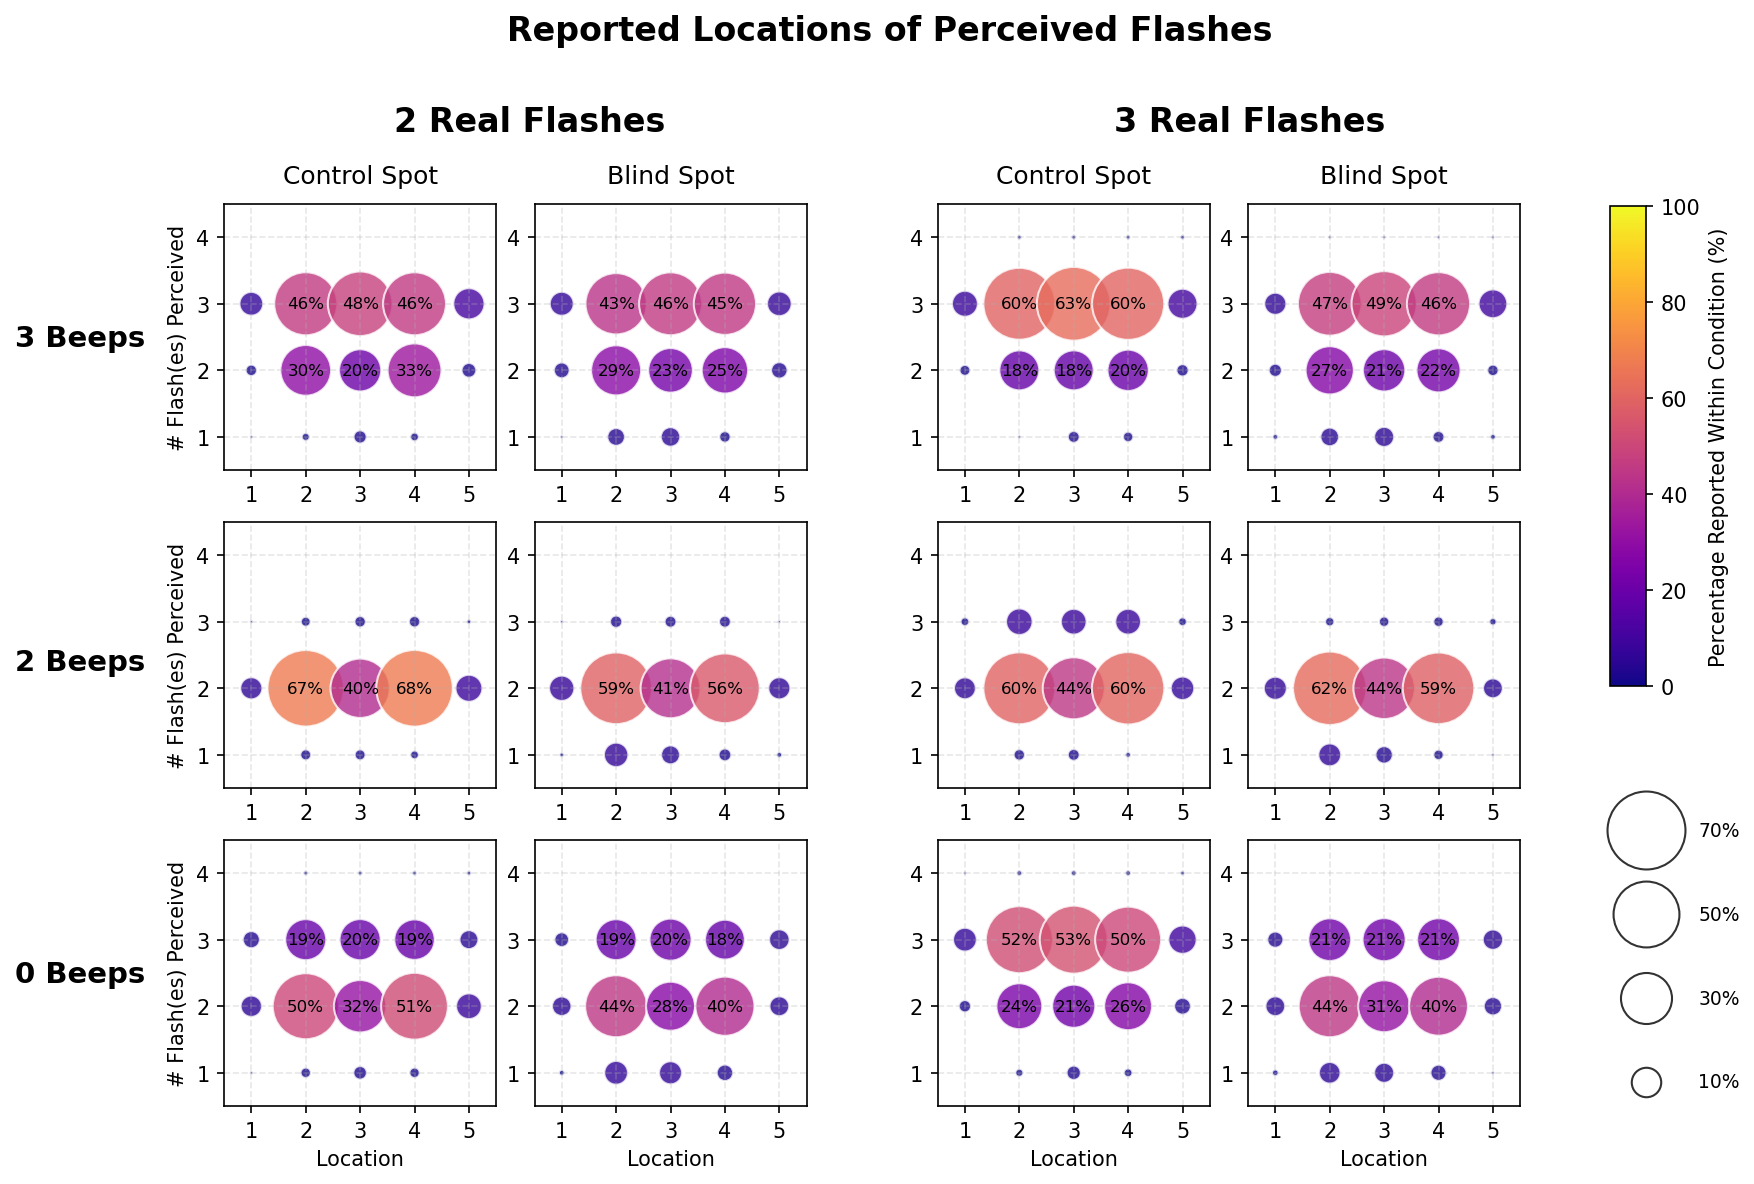

In [167]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

csv_files = [f for f in os.listdir('csv') if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join('csv', f)) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Only keep flash trials
flash_df = df[df['response_type'] == 1].copy()

# 12 subplots
# 2 Real Flashes - 3 Real Flashes
# Contrl-BS, Control-BS
# B3 - B2 - B0 (top -> bottom)

n_flash_conditions = [2, 3]
n_beep_conditions = [3, 2, 0]
blindspot_conditions = [0, 1]

fig = plt.figure(figsize=(12, 8), dpi=150)
fig.suptitle('Reported Locations of Perceived Flashes', y=1.06, fontsize=16, fontweight='bold')
norm = Normalize(vmin=0, vmax=100)
cmap = plt.get_cmap('plasma')

gs = plt.GridSpec(3, 5, figure=fig, width_ratios=[1, 1, 0.2, 1, 1])
axs = []
col_mapping = {0:0, 1:1, 2:3, 3:4}

for j, n_beep in enumerate(n_beep_conditions):  # Rows (0-2) by beep count
    for i, n_flash in enumerate(n_flash_conditions):  # Flash count groups (2,3)
        for k, blindspot in enumerate(blindspot_conditions):  # Control vs blind (0,1)
            new_col = col_mapping[i*2 + k]
            ax = fig.add_subplot(gs[j, new_col])
            axs.append(ax)           
            
            # Filter data for current condition
            condition_trials = flash_df[
                (flash_df['n_flash'] == n_flash) & 
                (flash_df['n_beep'] == n_beep) & 
                (flash_df['blindspot'] == blindspot)
            ]
            
            if len(condition_trials) == 0:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
                continue
            
            # Calculate percentages
            results = []
            for flash_percept in range(1, 5):
                subset = condition_trials[condition_trials['response'] == flash_percept]
                if len(subset) > 0:
                    for loc in range(1, 6):
                        loc_col = f'loc_{loc}'
                        perc = subset[loc_col].sum() / len(condition_trials) * 100
                        results.append({
                            'response': flash_percept,
                            'location': loc,
                            'percentage': perc,
                            'size': perc*20,
                            'total_trials': len(subset)
                        })
            
            results_df = pd.DataFrame(results)
            
            # Plot bubbles with size proportional to trial count
            scatter = ax.scatter(
                x='location',
                y='response',
                s='size',
                c='percentage',
                cmap=cmap,
                norm=norm,
                data=results_df,
                alpha=0.8,
                edgecolors='w'
            )
            
            # Add percentage labels 
            for _, row in results_df.iterrows():
                if row['percentage'] > 15:  # Only show if percentage > 15%
                    ax.text(
                        row['location'], row['response'],
                        f"{row['percentage']:.0f}%",
                        ha='center', va='center',
                        fontsize=8,
                        color='black' #if row['percentage'] > 50 else 'white'
                    )
    

            
            # Subplot customization
            condition_name = 'Control Spot' if blindspot == 0 else 'Blind Spot'
            ax.set_title(condition_name, pad=10) if n_beep == 3 else ax.set_title('')
            ax.set_xlabel('Location') if n_beep == 0 else ax.set_xlabel('')
            ax.set_ylabel('# Flash(es) Perceived') if n_flash == 2 and blindspot == 0 else ax.set_ylabel('')
            ax.set_yticks([1, 2, 3, 4])
            ax.set_xticks([1, 2, 3, 4, 5])
            ax.grid(True, linestyle='--', alpha=0.3)
            ax.set_ylim(0.5, 4.5)
            ax.set_xlim(0.5, 5.5)
    
# Add colorbar
cbar_ax = fig.add_axes([0.9, 0.5, 0.02, 0.4]) #left, bottom, width, height
sm = ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(sm, cax=cbar_ax, label='Percentage Reported Within Condition (%)')

# Bubble size legend
size_legend_ax = fig.add_axes([0.88, 0.1, 0.08, 0.35])  # Positioned below colorbar
size_legend_ax.axis('off')  # Hide axes
size_legend_ax.set_ylim(0, 1)  # Set y limits for the legend
# Define sizes and their corresponding percentages (adjust based on your actual size scaling)
size_percent_pairs = [
    (1400, "70%"),
    (1000, "50%"),
    (600, "30%"),
    (200, "10%"),
]

# Vertical positions for the bubbles (from top to bottom)
y_positions = np.linspace(0.8, 0.2, len(size_percent_pairs))

# Plot the size legend
for (size, perc), y in zip(size_percent_pairs, y_positions):
    size_legend_ax.scatter(
        [0], [y], 
        s=size, 
        color='w',
        alpha=0.8, 
        edgecolors='k',
        linewidth=1
    )
    size_legend_ax.text(
        0.04, y, perc, 
        va='center', 
        ha='left', 
        fontsize=9,
        fontfamily='sans-serif'
    )

# Add title for flash conditions
fig.text(0.3, .97, '2 Real Flashes', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.7, .97, '3 Real Flashes', ha='center', va='center', fontsize=16, fontweight='bold')

# Add beep condition labels
beep_labels = ['3 Beeps', '2 Beeps', '0 Beeps']
for label, label_y in zip(beep_labels, [.79, .52, .26]):
    fig.text(0.05, label_y, label, ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(left=0.13, right=0.85, bottom=0.15)
plt.show()

## Figure 4

../plots
inBS - Mean: 0.875, Standard Deviation: 0.18298126367784998
Illusory distances - Test Statistic: 2296.0, p-value: 0.008083820499860297
Third distances - Test Statistic: 2973.0, p-value: 4.063800283591906e-08


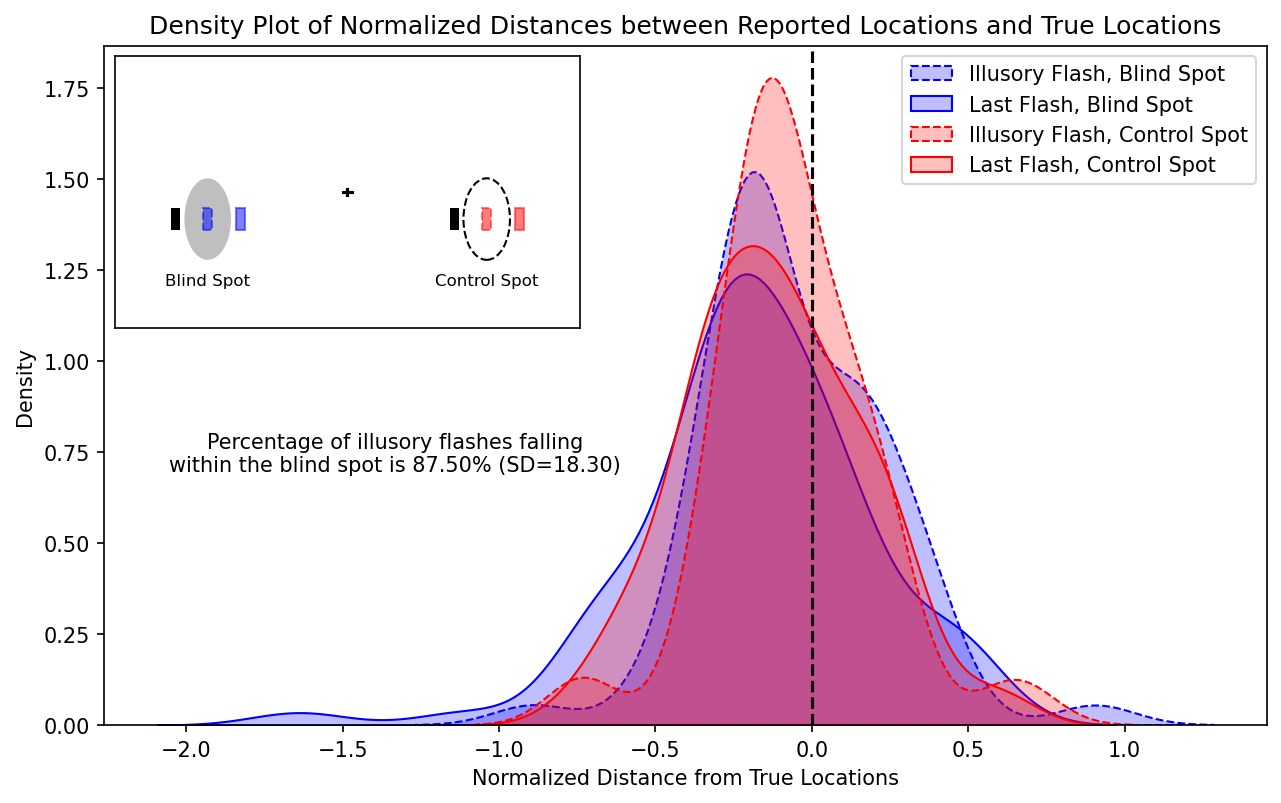

In [56]:
import numpy as np
from scipy.stats import wilcoxon
import os
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse, Rectangle


dataDir = os.getcwd()
plotDir = '../plots'
print(plotDir)
allDataDir = os.path.join(dataDir, 'allData.mat')

# Load the .mat file
mat_data = scipy.io.loadmat(allDataDir)

# Access the 'allData' structure
all_data = mat_data['allData']


# Function to extract illusory and third distances
def extract_distances(f_extra_entry):
    illusory_dist = [entry[3][0][0] for entry in f_extra_entry]  # 4th column for illusory distances
    third_dist = [entry[4][0][0] for entry in f_extra_entry]     # 5th column for third distances
    return illusory_dist, third_dist

# List of subject IDs to include
subject_ids_to_include = ['SV009', 'SV012', 'SV026', 'SV027', 'SV028', 'SV029', 'SV030', 'SV031', 'SV032', 'SV033']

# Extract subject IDs and filter for the ones in subject_ids_to_include
subject_ids = np.array([sid[0] for sid in all_data['SID'][0]])  # Extract simple array of subject IDs
subject_indices = [i for i, sid in enumerate(subject_ids) if sid in subject_ids_to_include]

# Extract the corresponding F_extra data for these subjects
f_extra_subjects = all_data['F_extra'][0, subject_indices]
inBS = np.concatenate(all_data['inBS'][0, subject_indices])
# print(inBS)
# Calculate mean and standard deviation for inBS
inBS_mean = np.nanmean(inBS)
inBS_std = np.nanstd(inBS)
print(f"inBS - Mean: {inBS_mean}, Standard Deviation: {inBS_std}")

# Initialize lists to store distances
illusory_distances = []
third_distances = []

# Loop through each subject's F_extra data and extract distances
for subject_entry in f_extra_subjects:
    illusory, third = extract_distances(subject_entry)
    illusory_distances.extend(illusory)
    third_distances.extend(third)

# Remove NaN values from the distances
illusory_distances = [dist for dist in illusory_distances if not np.isnan(dist)]
third_distances = [dist for dist in third_distances if not np.isnan(dist)]
# inBS = [entry for entry in inBS if not np.isnan(entry)]
# print(inBS)

# Perform Wilcoxon signed-rank test comparing distances to zero
illusory_test_stat, illusory_p_value = wilcoxon(illusory_distances, zero_method='wilcox', correction=False)
third_test_stat, third_p_value = wilcoxon(third_distances, zero_method='wilcox', correction=False)

# Output the test results
print(f"Illusory distances - Test Statistic: {illusory_test_stat}, p-value: {illusory_p_value}")
print(f"Third distances - Test Statistic: {third_test_stat}, p-value: {third_p_value}")

# Assuming the earlier process of extracting data was successful, we use the same indices to separate the data:
blind_spot_indices = [0, 1, 2, 3, 8, 9, 10, 11]  # Python zero-based index
control_spot_indices = [i for i in range(len(f_extra_subjects[0])) if i not in blind_spot_indices]

# Function to extract distances based on indices
def extract_distances_by_spot(f_extra_entry, indices):
    illusory_dist = [entry[3][0][0] for idx, entry in enumerate(f_extra_entry) if idx in indices]
    third_dist = [entry[4][0][0] for idx, entry in enumerate(f_extra_entry) if idx in indices]
    return illusory_dist, third_dist

# Initialize lists to hold distances for both blind and control spots
illusory_blind_spot = []
third_blind_spot = []
illusory_control_spot = []
third_control_spot = []

# Loop through each subject's F_extra data to extract distances
for subject_entry in f_extra_subjects:
    illusory_blind, third_blind = extract_distances_by_spot(subject_entry, blind_spot_indices)
    illusory_control, third_control = extract_distances_by_spot(subject_entry, control_spot_indices)
    illusory_blind_spot.extend(illusory_blind)
    third_blind_spot.extend(third_blind)
    illusory_control_spot.extend(illusory_control)
    third_control_spot.extend(third_control)

# Function to clean and filter numeric data
def clean_data(data):
    return np.array([dist for dist in data if isinstance(dist, (int, float)) and np.isfinite(dist)])

# Clean the distances for plotting
illusory_blind_spot = clean_data(illusory_blind_spot)
third_blind_spot = clean_data(third_blind_spot)
illusory_control_spot = clean_data(illusory_control_spot)
third_control_spot = clean_data(third_control_spot)

# Create the density plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Plot density for blind spot
sns.kdeplot(illusory_blind_spot, fill=True, color="blue", label="Illusory Flash, Blind Spot", linestyle="--", ax=ax)
sns.kdeplot(third_blind_spot, fill=True, color="blue", label="Last Flash, Blind Spot", ax=ax)

# Plot density for control spot
sns.kdeplot(illusory_control_spot, fill=True, color="red", label="Illusory Flash, Control Spot", linestyle="--", ax=ax)
sns.kdeplot(third_control_spot, fill=True, color="red", label="Last Flash, Control Spot", ax=ax)

# Plot a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
ax.set_title('Density Plot of Normalized Distances between Reported Locations and True Locations')
ax.set_xlabel('Normalized Distance from True Locations')
ax.set_ylabel('Density')
ax.legend()

# Add a sentence to the plot
percentage_text = f"Percentage of illusory flashes falling\nwithin the blind spot is {inBS_mean*100:.2f}% (SD={inBS_std*100:.2f})"
ax.text(0.25, .4, percentage_text, ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Add an inset diagram
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper left')

# Draw a fixation cross at the center of the inset
center_x, center_y = 0.5, 0.5
cross_len = 0.01
ax_inset.plot([center_x - cross_len, center_x + cross_len], [center_y, center_y], 'k-')  # Horizontal line
ax_inset.plot([center_x, center_x], [center_y - cross_len, center_y + cross_len], 'k-')  # Vertical line

# Draw blind spot and control spot circles
y_offset = 0.14
blind_spot = Ellipse((center_x - 0.3, center_y - 0.1), width=0.1, height=0.3, edgecolor='none', facecolor='gray', alpha=0.5)
ax_inset.add_patch(blind_spot)
ax_inset.text(center_x - 0.3, center_y - 0.3, 'Blind Spot', ha='center', va='top', fontsize=8)
illusory_flash_bs = Rectangle((center_x - 0.31, center_y - y_offset), width=0.02, height=0.08, 
                              edgecolor='blue', facecolor='blue', alpha=0.5, linestyle='--')
ax_inset.add_patch(illusory_flash_bs)
last_flash_bs = Rectangle((center_x - 0.24, center_y - y_offset), width=0.02, height=0.08, 
                          edgecolor='blue', facecolor='blue', alpha=0.5)
ax_inset.add_patch(last_flash_bs)

control_spot = Ellipse((center_x + 0.3, center_y - 0.1), width=0.1, height=0.3, edgecolor='black', facecolor='none', linestyle='--')
ax_inset.add_patch(control_spot)
ax_inset.text(center_x + 0.3, center_y - 0.3, 'Control Spot', ha='center', va='top', fontsize=8)
illusory_flash_ctrl = Rectangle((center_x + 0.29, center_y - y_offset), width=0.02, height=0.08, 
                              edgecolor='red', facecolor='red', alpha=0.5, linestyle='--')
ax_inset.add_patch(illusory_flash_ctrl)
last_flash_ctrl = Rectangle((center_x + 0.36, center_y - y_offset), width=0.02, height=0.08, 
                          edgecolor='red', facecolor='red', alpha=0.5)
ax_inset.add_patch(last_flash_ctrl)

# draw first flashes
first_flash_bs = Rectangle((center_x - 0.38, center_y - y_offset), width=0.02, height=0.08, 
                          edgecolor='none', facecolor='black')
ax_inset.add_patch(first_flash_bs)
first_flash_ctrl = Rectangle((center_x + 0.22, center_y - y_offset), width=0.02, height=0.08, 
                          edgecolor='none', facecolor='black')
ax_inset.add_patch(first_flash_ctrl)

ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Show the plot
plt.savefig(os.path.join(plotDir, 'density.png'))
plt.show()


In [9]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(illusory_blind_spot, illusory_control_spot)
print(f"Illusory Blind vs. Control Spots: KS-statistic = {ks_stat}, p-value = {p_value}")

ks_stat, p_value = ks_2samp(third_blind_spot, third_control_spot)
print(f"Third Blind vs. Control Spots: KS-statistic = {ks_stat}, p-value = {p_value}")

from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(illusory_blind_spot, illusory_control_spot)
print(f"Illusory Blind vs. Control Spots: U-statistic = {u_stat}, p-value = {p_value}")

from scipy.stats import levene

levene_stat, p_value = levene(illusory_blind_spot, illusory_control_spot)
print(f"Illusory Blind vs. Control Spots: Levene-statistic = {levene_stat}, p-value = {p_value}")

Illusory Blind vs. Control Spots: KS-statistic = 0.1475204017576899, p-value = 0.507638158667838
Third Blind vs. Control Spots: KS-statistic = 0.12187812187812187, p-value = 0.5562244394790551
Illusory Blind vs. Control Spots: U-statistic = 1547.0, p-value = 0.793681405702127
Illusory Blind vs. Control Spots: Levene-statistic = 0.8135475731238471, p-value = 0.36902651099472994


## Figure 5

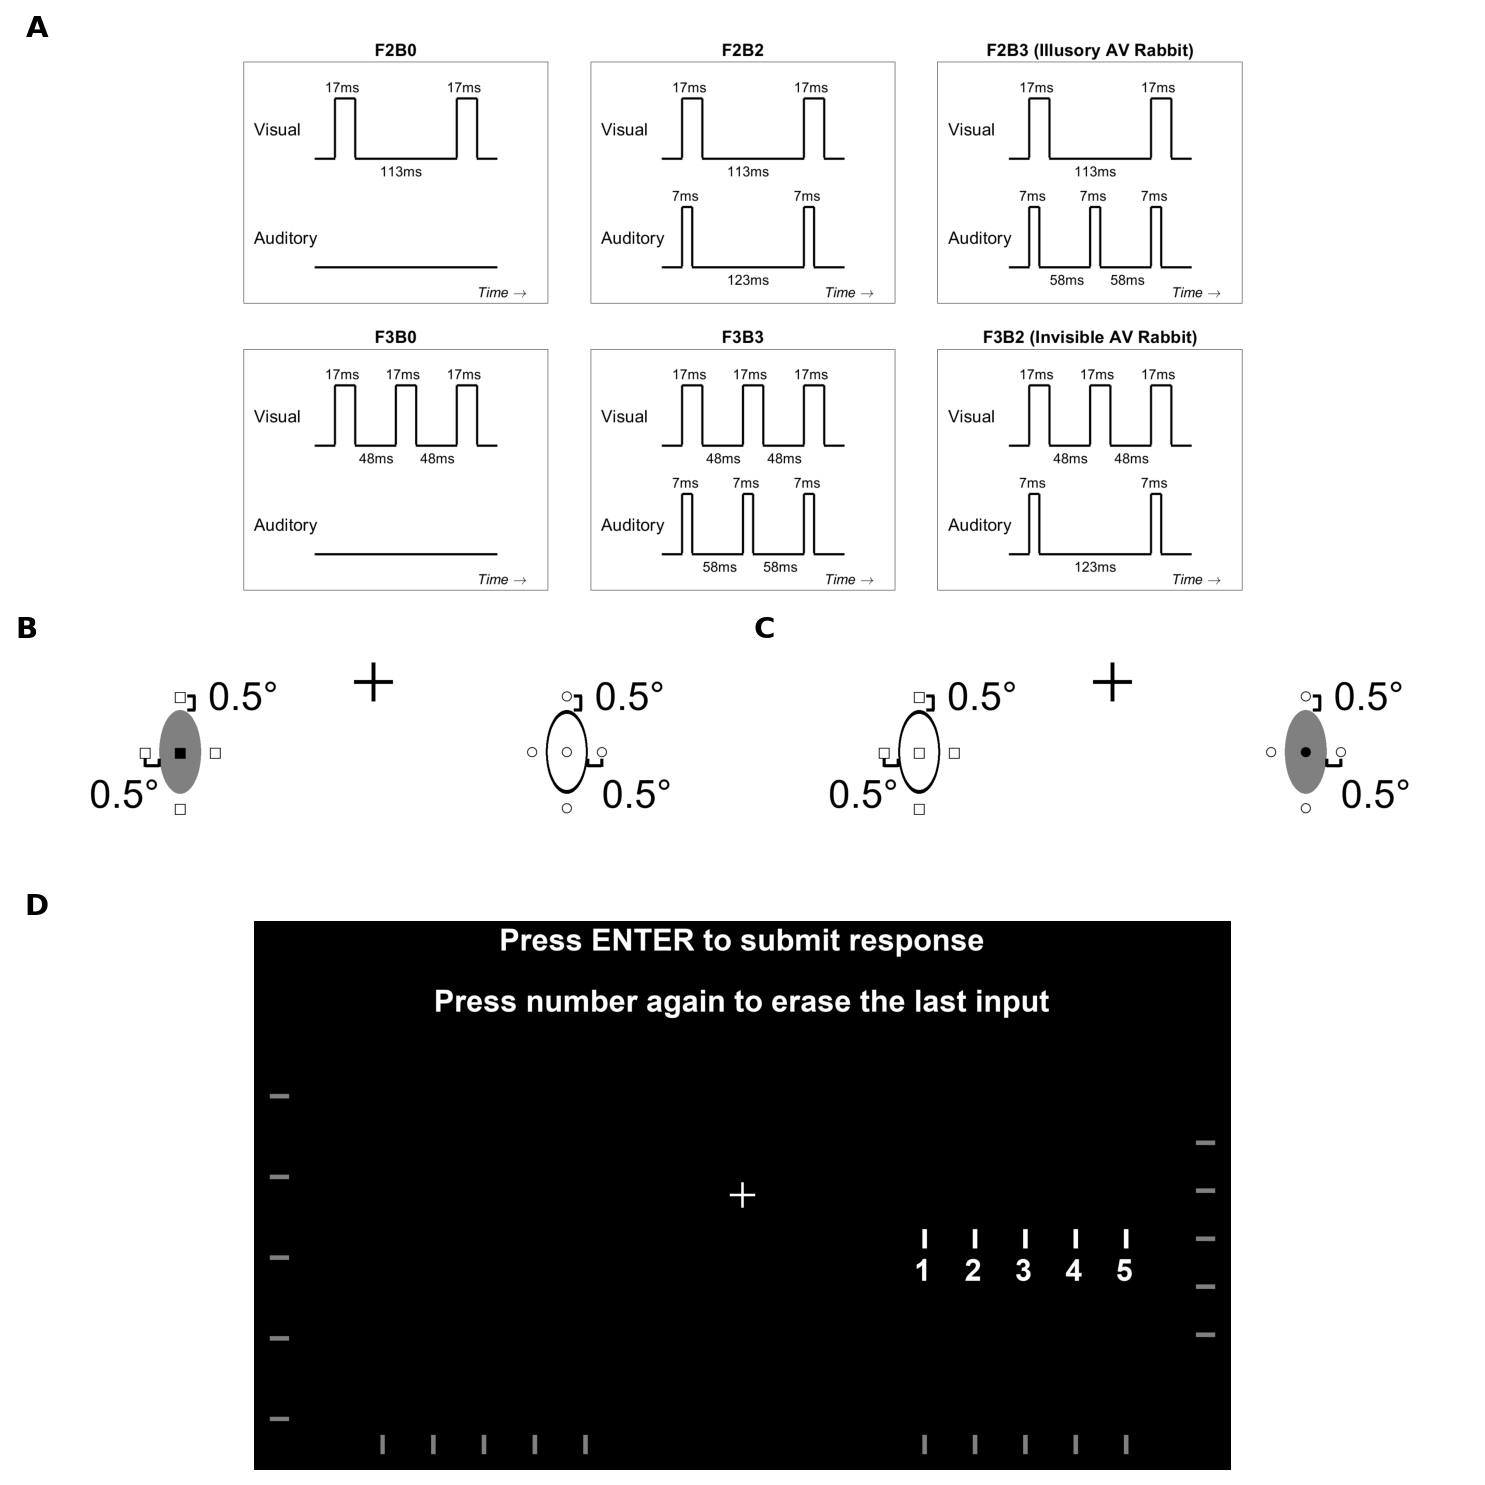

In [55]:
import matplotlib.pyplot as plt
from PIL import Image

# Load images
A = Image.open("../plots/schematics_allConditions.png")
B = Image.open("../plots/bs_flash_L.png")
C = Image.open("../plots/bs_flash_R.png")
D = Image.open("../plots/flashResp.png")

# crop panels B and C
# (left, upper, right, lower)
box = (1000, 980, 2840, 1560)
B = B.crop(box)
C = C.crop(box)

pad = 0

# Create a 2x2 grid layout for the figure
fig = plt.figure(figsize=(10, 10), dpi=150)

ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=2, colspan=2)
ax1.imshow(A)
ax1.axis('off')  # Hide axis ticks
ax1.set_title('A', loc='left', fontsize=14, fontweight='bold', pad=pad, x=-.215)

ax2 = plt.subplot2grid((5, 2), (2, 0))
ax2.imshow(B)
ax2.axis('off')
ax2.set_title('B', loc='left', fontsize=14, fontweight='bold', pad=pad)

ax3 = plt.subplot2grid((5, 2), (2, 1))
ax3.imshow(C)
ax3.axis('off')
ax3.set_title('C', loc='left', fontsize=14, fontweight='bold', pad=pad)

ax4 = plt.subplot2grid((5, 2), (3, 0), rowspan=2, colspan=2)
ax4.imshow(D)
ax4.axis('off')
ax4.set_title('D', loc='left', fontsize=14, fontweight='bold', pad=pad, x=-.236)

# Adjust layout
plt.tight_layout()
plt.savefig("../plots/schematics.png", dpi=150)
plt.show()